<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 144.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 160.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 139.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 154.9 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [8]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


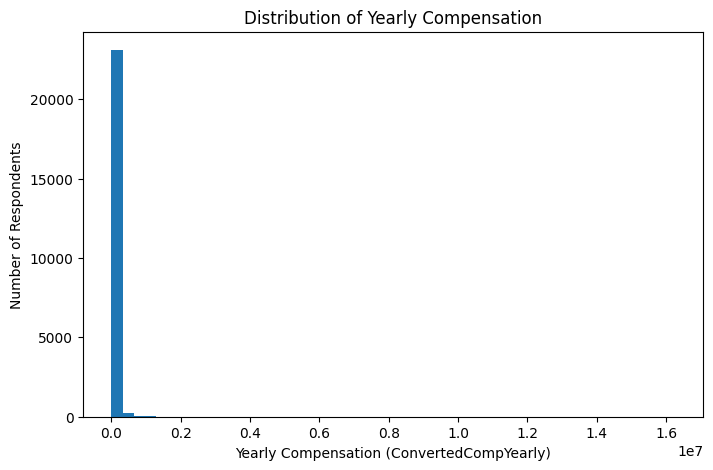

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [10]:
# Drop missing values
compensation = df['ConvertedCompYearly'].dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(compensation, bins=50)
plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Yearly Compensation")
plt.show()

# Display summary statistics
print(compensation.describe())


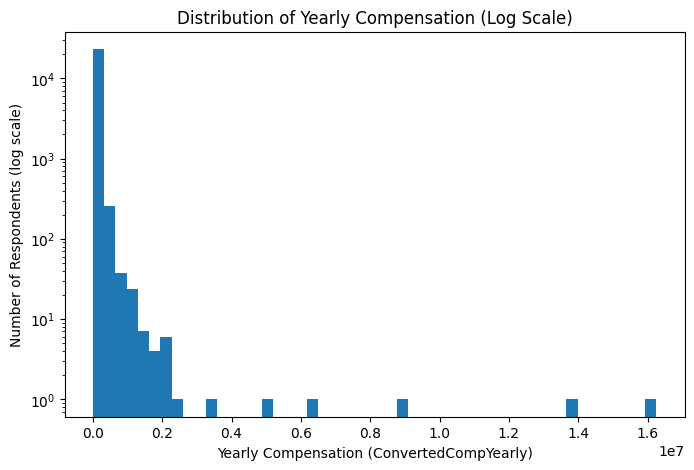

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(compensation, bins=50, log=True)
plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Number of Respondents (log scale)")
plt.title("Distribution of Yearly Compensation (Log Scale)")
plt.show()

#(Optional – Better visualization for skewed data)
#Since salary data is usually right-skewed, this log-scale version is often preferred:

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [12]:
# Filter the data for full-time employees
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate the median compensation
median_compensation = full_time_df['ConvertedCompYearly'].median()

print("Median Compensation for Full-Time Employees:", median_compensation)

# df['Employment'] == 'Employed, full-time' filters rows where the employment status is full-time.

# full_time_df['ConvertedCompYearly'].median() calculates the median of the yearly compensation for

Median Compensation for Full-Time Employees: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



<Figure size 1800x1200 with 0 Axes>

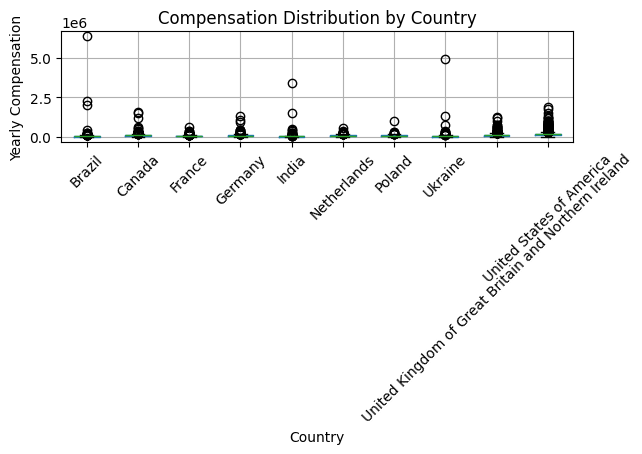

In [17]:
# Keep relevant columns and remove missing values
df_comp = df[['Country', 'ConvertedCompYearly']].dropna()

# Remove zero or negative compensation values
df_comp = df_comp[df_comp['ConvertedCompYearly'] > 0]

# Select top 10 countries by respondent count
top_countries = df_comp['Country'].value_counts().head(10).index
df_comp = df_comp[df_comp['Country'].isin(top_countries)]

# Create box plot
plt.figure(figsize=(18, 12))
df_comp.boxplot(column='ConvertedCompYearly', by='Country', rot=45)
plt.title('Compensation Distribution by Country')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [19]:
# Select compensation column and drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Calculate IQR
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df_clean[
    (df_clean['ConvertedCompYearly'] >= lower_bound) &
    (df_clean['ConvertedCompYearly'] <= upper_bound)
]

# Validate dataset size
print("Original dataset size:", df.shape)
print("After removing outliers:", df_no_outliers.shape)


Original dataset size: (65437, 114)
After removing outliers: (22457, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [20]:
# Select relevant columns and drop missing values
corr_df = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Calculate correlation matrix
correlation_matrix = corr_df.corr()

print(correlation_matrix)


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153182        0.020156
WorkExp                         0.153182  1.000000       -0.028839
JobSatPoints_1                  0.020156 -0.028839        1.000000


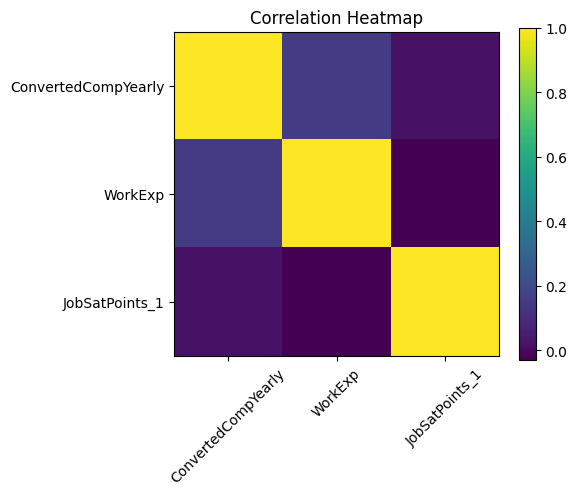

In [21]:
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix)
plt.colorbar()

# Axis labels
plt.xticks(range(len(correlation_matrix.columns)),
           correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)),
           correlation_matrix.columns)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [22]:
# Select required columns and drop missing values
scatter_df = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()


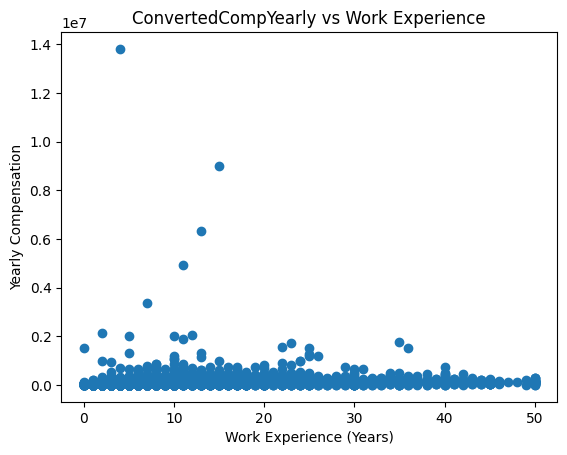

In [23]:
plt.figure()
plt.scatter(scatter_df['WorkExp'], scatter_df['ConvertedCompYearly'])
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.title('ConvertedCompYearly vs Work Experience')
plt.show()


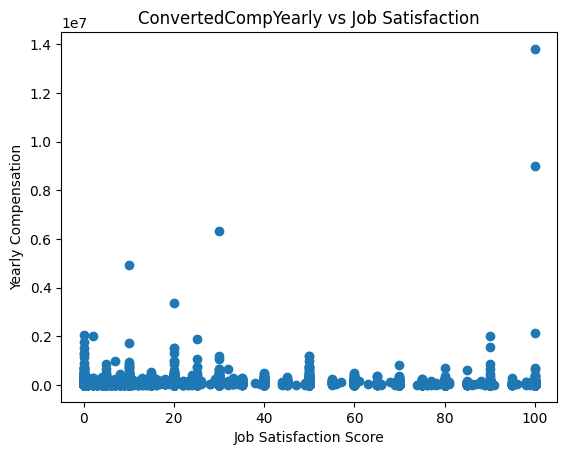

In [24]:
plt.figure()
plt.scatter(scatter_df['JobSatPoints_1'], scatter_df['ConvertedCompYearly'])
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation')
plt.title('ConvertedCompYearly vs Job Satisfaction')
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
